In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

import os
print(os.listdir("./input"))

['master.csv']


In [4]:
file_path = './input/master.csv'
df = pd.read_csv(file_path)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.describe() 

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
col = ['year', 'population',
       'suicides/100k pop',
        'gdp_per_capita ($)']
df1 = df[col]
print(df1.head())
y = df['suicides_no']
print(y.head())

   year  population  suicides/100k pop  gdp_per_capita ($)
0  1987      312900               6.71                 796
1  1987      308000               5.19                 796
2  1987      289700               4.83                 796
3  1987       21800               4.59                 796
4  1987      274300               3.28                 796
0    21
1    16
2    14
3     1
4     9
Name: suicides_no, dtype: int64


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [10]:
# devide the dataset into the 
train_x, test_x, train_y, test_y = train_test_split(df1,y, test_size = 0.2)
print(train_x.shape, train_y.shape)
print(test_y.shape, test_x.shape)
print(train_x.head())

(22256, 4) (22256,)
(5564,) (5564, 4)
       year  population  suicides/100k pop  gdp_per_capita ($)
1604   1999     1366184               0.73               22016
5749   1994     3343400               3.89                2646
13713  2014    16213000              33.78               40328
6510   2006      252215               0.79               11914
5668   1987     1210423               0.83                1299


In [11]:
train_x.head()


,year,population,suicides/100k pop,gdp_per_capita ($)
1604,1999,1366184,0.73,22016
5749,1994,3343400,3.89,2646
13713,2014,16213000,33.78,40328
6510,2006,252215,0.79,11914
5668,1987,1210423,0.83,1299


In [12]:
model = DecisionTreeRegressor(random_state=0)
model.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [13]:
predict = model.predict(test_x)

<Figure size 432x288 with 0 Axes>

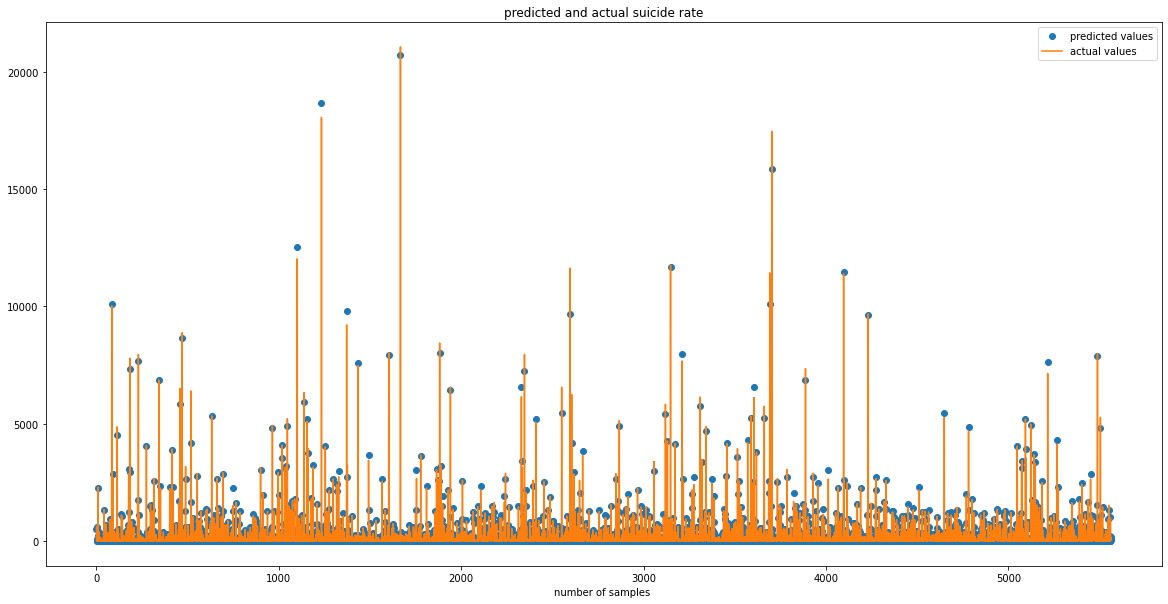

In [14]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(len(predict)),predict, 'o', label = "predicted values")
plt.title('predicted and actual suicide rate')
plt.xlabel("number of samples ")
#plt.figure(2)
plt.plot(np.arange(len(predict)),test_y.values, label = "actual values")
plt.legend(loc = 'best')
#plt.title('actual suicide rate')

In [15]:
# accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict)

0.49065420560747663

In [16]:
# mean absolute error 
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(test_y, predict)

11.168943206326384

In [17]:
# mean absolute percentage error 
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mape(test_y, predict)

3.1043389459045967